In [1]:
##################################
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import seaborn as sns
import random
##################################

In [2]:
df = pd.read_csv("bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
"""
This cell reformats the data into integers with each unique data being its own number so that it can be clustered properly
"""
job = [ "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown"]

for ii in range(len(job)): 
    df.job[df.job == job[ii]] = ii

marital = ["divorced","married","single","unknown"]

for ii in range(len(marital)):
    df.marital[df.marital == marital[ii]] = ii

education =  ["primary","secondary","tertiary","unknown"]

for ii in range(len(education)):
    df.education[df.education == education[ii]] = ii

df.default[df.default == "no" ] = 0
df.default[df.default == "yes" ] = 1

df.housing[df.housing == "no" ] = 0
df.housing[df.housing == "yes" ] = 1

df.loan[df.loan == "no" ] = 0
df.loan[df.loan == "yes" ] = 1

contact = ["telephone","cellular","unknown"] 

for ii in range(len(contact)):
    df.contact[df.contact == contact[ii]] = ii

month = ["jan", "feb", "mar", "apr", "may","jun", "jul", "aug", "sep", "oct","nov", "dec"]

for ii in range(len(month)):
    df.month[df.month == month[ii]] = ii

poutcome = ["other","failure","success", "unknown"]


for ii in range(len(poutcome)):
    df.poutcome[df.poutcome == poutcome[ii]] = ii

df.y[df.y == "no" ] = 0
df.y[df.y == "yes" ] = 1
df.y = df.y.astype('int')

In [4]:
"""
Grabs a random sample of 500 rows from the data set for analysis
"""
sampled = df.sample(500)

sampled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4200,49,4,2,0,0,548,0,0,0,31,6,115,6,-1,0,3,0
334,30,4,2,2,0,424,0,0,1,16,3,298,4,-1,0,3,1
256,34,4,1,2,0,415,0,1,1,23,6,361,2,-1,0,3,0
2213,24,8,2,1,0,822,0,0,1,27,9,184,1,91,2,1,1
1079,50,0,0,1,0,202,0,1,1,17,10,148,1,-1,0,3,0


In [5]:
sampled = sampled[~sampled.isin([np.nan, np.inf, -np.inf]).any(1)]
sampled

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4200,49,4,2,0,0,548,0,0,0,31,6,115,6,-1,0,3,0
334,30,4,2,2,0,424,0,0,1,16,3,298,4,-1,0,3,1
256,34,4,1,2,0,415,0,1,1,23,6,361,2,-1,0,3,0
2213,24,8,2,1,0,822,0,0,1,27,9,184,1,91,2,1,1
1079,50,0,0,1,0,202,0,1,1,17,10,148,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,34,2,0,2,0,262,0,0,1,20,10,371,1,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,4,153,1,-1,0,3,0
1496,44,10,2,1,0,3945,0,0,1,28,0,255,1,-1,0,3,0
1037,43,4,1,2,0,2767,1,0,2,15,4,317,7,-1,0,3,0


[0.09270639 0.06289806 0.03706362 0.04590483 0.0049481  0.08276661
 0.02074154 0.01401143 0.03093588 0.09195414 0.091184   0.24410407
 0.05960405 0.03877268 0.03129371 0.05111088]


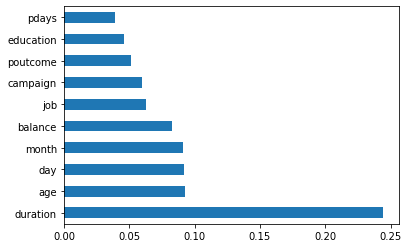

In [6]:
"""
Sets the input attributes as the first 16, with the 17th attribute acting as the output.
The most relevent attributes that apply to the output are then graphed through the feature importance function.
"""
x = df.iloc[:, 0:16]
y = df.iloc[:, -1]
y = y.astype('int')

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

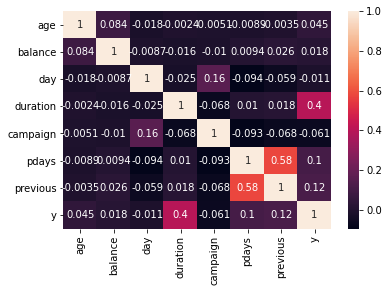

In [12]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [8]:
"""
Filters the sample array set down to the 4 most influential attributes
"""
new_df = np.array(sampled[['duration','month','day','age']])

new_df = np.nan_to_num(new_df)
new_df = new_df.astype('int')

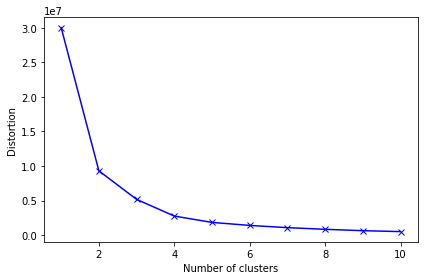

In [9]:
"""
Generates the elbow graph to help identify the number of clusters
"""
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [10]:
"""
Fits the data to the KMeans algorithm for clustering based on the most 'balanced' K value found in the elbow graph
"""

km = KMeans(3)

km.fit(df)

KMeans(n_clusters=3)

In [13]:
"""
Preps and fits the pca algorithm to be able to easily plot the kmeans
"""
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(df)
pca_components

labels = km.labels_

In [14]:
"""
Check to see the pca columns
"""
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,364.582608,-184.649323
1,3366.491352,-37.862432
2,-72.458929,-77.675332
3,53.416417,-65.071303
4,-1422.611072,-40.117357


In [15]:
"""
Sets the data for plotting
"""
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,364.582608,-184.649323,0
1,3366.491352,-37.862432,2
2,-72.458929,-77.675332,0
3,53.416417,-65.071303,0
4,-1422.611072,-40.117357,0


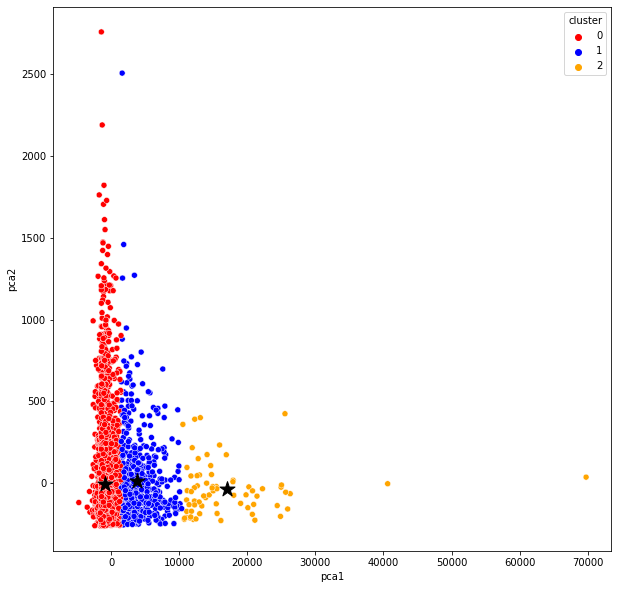

In [26]:
"""
Graphs the clusters for the total dataset
"""
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [27]:
"""
Calculates the percentages of each result type
"""
print("Percentage of positives")
sampled['y'].value_counts()/len(sampled)

Percentage of positives


0    0.892
1    0.108
Name: y, dtype: float64

In [28]:
"""
Defines the x and y for the KFold cross validation
"""
x = new_df
y = np.array(sampled['y'])

In [29]:
"""
Generates the predicted scores from the cross validation scores
"""
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [30]:
"""
Generates the accuracy score for the average predicted values
"""
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.892 ( +/- 0.040)


In [31]:
"""
Prints the predicted values from the cross validation
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict

X_train, X_test, Y_train, Y_test = train_test_split(new_df, y,train_size = 0.8, random_state=1)

clf = LinearDiscriminantAnalysis()
clf.fit(new_df, y)

predicted = cross_val_predict(clf, new_df, y, cv=cv)

predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
"""
Prints out a dataframe with the the actual and predicted values as columns
"""
data = {'y_Actual': sampled['y'],
        'y_Predicted': predicted}

data = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
data

In [32]:
"""
Prints a classification summary with more metrics to determine accuracy
"""
from sklearn.metrics import classification_report
print(classification_report(sampled['y'], predicted))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       446
           1       0.52      0.22      0.31        54

    accuracy                           0.89       500
   macro avg       0.72      0.60      0.63       500
weighted avg       0.87      0.89      0.87       500



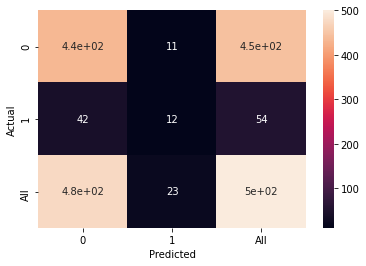

In [35]:
"""
Prints out confusion matrix
"""
confusion_matrix = pd.crosstab(data['y_Actual'], data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins= True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()